In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pymc3 as pm

# Rates

in der Studie werden Rates nicht als Wahrscheinlicheiten sondern als Quotienten definiert. Selbst da gibt es noch ein paar Rechenfehler in der Berechnung der Fehler von Quotienten.

# Viertes Model: Alles zusammen

Hier werden alle Unsicherheiten mit einberechnet.

In [9]:
with pm.Model() as model_4:
    infection_rate = pm.Normal(mu=0.1553, sd=(0.1896-0.1231)/4, name='infection_rate')
    
    total_population = 12597
    number_infected = pm.Deterministic(var=total_population*infection_rate, name='number_infected')
    
    fatality_count = 7
    infection_fatality_rate = pm.Deterministic(var=fatality_count/number_infected, name='infection_fatality_rate')
    
    # That is the problem here!
    german_infection_fatality_rate = infection_fatality_rate
    
    german_fatality_count = 6575
    german_infected_count = pm.Deterministic(var=german_fatality_count / german_infection_fatality_rate, name='german_infected_count')
    
    prior_4 = pm.sample_prior_predictive(samples=int(1e5))

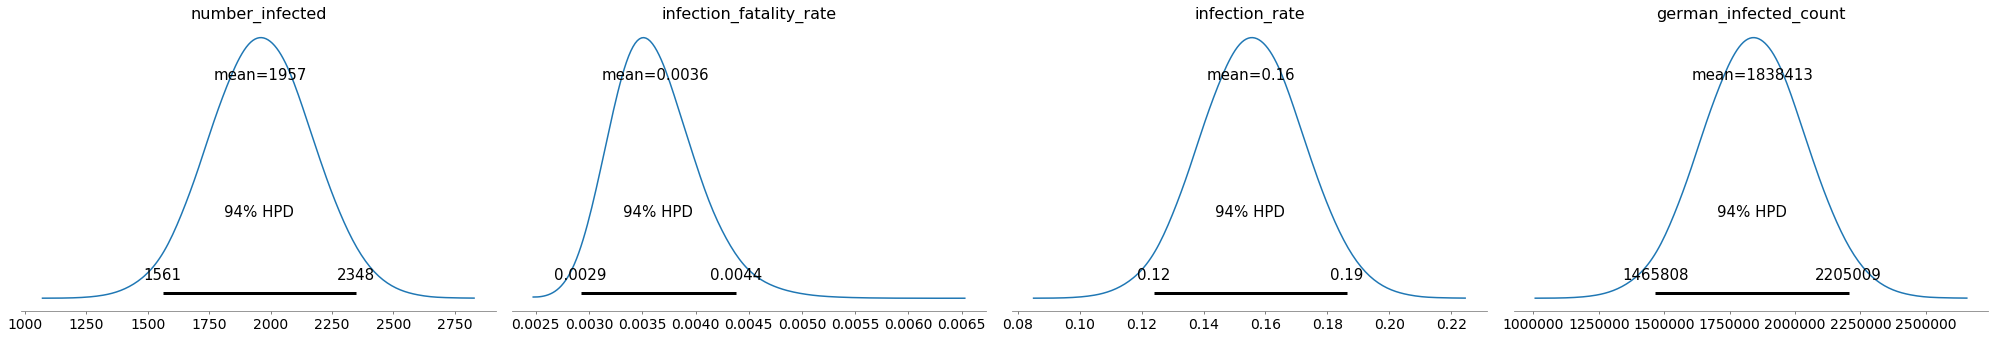

In [10]:
pm.plot_posterior(prior_4);

Die Intervalle scheinen recht ähnlich wie in der Studie zu sein, aber jetzt sieht man auch mal was die als Fehler auf dem Infiziertencount in Deutschland bekommen würden.